In [64]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import StratifiedKFold, cross_validate

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [71]:
pd.read_csv('encoded_dataset.csv')

,rideable_type,member_casual,date,day_of_week,month,season,trip_duration_mins,hour,trips
0,1,0,1,0,1,0,2,14,1
1,1,0,1,0,1,0,2,15,2
2,1,0,1,0,1,0,2,17,1
3,1,0,1,0,1,0,2,23,1
4,1,0,1,0,1,0,3,0,2
...,...,...,...,...,...,...,...,...,...
692276,0,1,31,0,12,0,69,17,1
692277,0,1,31,0,12,0,79,17,1
692278,0,1,31,0,12,0,88,22,1
692279,0,1,31,0,12,0,89,2,1


In [75]:
def returnDataset(filename):
    X = pd.read_csv('X_data_sample.csv', skipinitialspace=True)
    y = pd.read_csv('y_data_sample.csv', skipinitialspace=True)
    y = y.values.ravel()

    display(X.head())
    display(X.shape)
    display(y[:5])
    display(y.shape)

    return X, y

In [76]:
X, y = returnDataset('sampledata.csv')

,rideable_type,day_of_week,month,season,trip_duration_mins,hour,trips,day_of_month
0,0,2,11,3,25,17,1,21
1,1,0,9,3,135,9,1,3
2,1,4,7,2,13,9,6,20
3,1,2,7,2,6,11,7,11
4,0,0,9,3,55,10,2,3


(197794, 8)

array([1, 0, 0, 0, 0])

(197794,)

In [77]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [80]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x12b28fa60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x12b333190>})

In [81]:
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 17, 'n_estimators': 455}


In [82]:
y_pred = rand_search.predict(X_test)

In [83]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.676367987327053
Precision: 0.682367984517556
Recall: 0.6635190536998454


In [84]:
best_rf = rand_search.best_estimator_

In [85]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

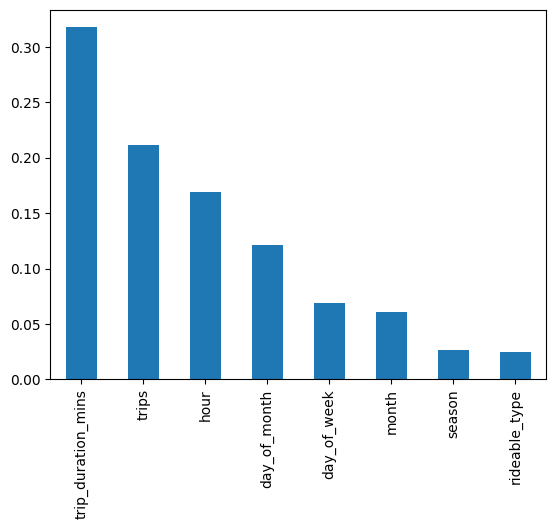

In [86]:
feature_importances.plot.bar();